In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_ballbyball = pd.read_csv('IPL_Ball_by_Ball_2008_2022.csv')
df_matches = pd.read_csv('IPL_Matches_2008_2022.csv')

In [3]:
df_ballbyball.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [4]:
df_ballbyball.shape

(225954, 17)

In [5]:
df_matches.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [6]:
df_matches.shape

(950, 20)

In [7]:
df_ballbyball['BattingTeam'].value_counts()

Mumbai Indians                 27826
Royal Challengers Bangalore    26512
Kolkata Knight Riders          26192
Chennai Super Kings            25128
Rajasthan Royals               22777
Kings XI Punjab                22646
Delhi Daredevils               18786
Sunrisers Hyderabad            18196
Deccan Chargers                 9034
Delhi Capitals                  7587
Pune Warriors                   5443
Gujarat Lions                   3566
Punjab Kings                    3388
Gujarat Titans                  1971
Rising Pune Supergiant          1900
Lucknow Super Giants            1840
Kochi Tuskers Kerala            1582
Rising Pune Supergiants         1580
Name: BattingTeam, dtype: int64

In [8]:
# Replacing the old team names with new ones

def change_team_names(x):
    if x == 'Deccan Chargers':
        return 'Sunrisers Hyderabad'
    elif x == 'Pune Warriors' or x == 'Rising Pune Supergiant':
        return 'Rising Pune Supergiants'
    elif x == 'Delhi Daredevils':
        return 'Delhi Capitals'
    elif x == 'Kings XI Punjab':
        return 'Punjab Kings'
    elif x == 'Gujarat Lions':
        return 'Gujarat Titans'
    else:
        return x


df_ballbyball['BattingTeam'] = df_ballbyball['BattingTeam'].apply(change_team_names)
df_matches['Team1'] = df_matches['Team1'].apply(change_team_names)
df_matches['Team2'] = df_matches['Team2'].apply(change_team_names)
df_matches['TossWinner'] = df_matches['TossWinner'].apply(change_team_names)
df_matches['WinningTeam'] = df_matches['WinningTeam'].apply(change_team_names)

In [9]:
#df_ballbyball.to_csv('ball_by_ball_updated.csv')
#df_matches.to_csv('matches_updated.csv')

In [10]:
df_matches['Player_of_Match'].value_counts()

AB de Villiers    25
CH Gayle          22
DA Warner         18
RG Sharma         18
MS Dhoni          17
                  ..
CR Brathwaite      1
Mohsin Khan        1
A Zampa            1
BCJ Cutting        1
MF Maharoof        1
Name: Player_of_Match, Length: 262, dtype: int64

In [11]:
df_matches['Player_of_Match'].nunique()

262

In [12]:
# Merging the two dataframes on 'ID'

df_ballbyball = df_ballbyball.merge(df_matches, on='ID')

In [13]:
df_ballbyball.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam', 'City', 'Date', 'Season',
       'MatchNumber', 'Team1', 'Team2', 'Venue', 'TossWinner', 'TossDecision',
       'SuperOver', 'WinningTeam', 'WonBy', 'Margin', 'method',
       'Player_of_Match', 'Team1Players', 'Team2Players', 'Umpire1',
       'Umpire2'],
      dtype='object')

In [14]:
# Creating a separate column for bowling team

df_ballbyball['BowlingTeam'] = np.where(df_ballbyball['BattingTeam'] == df_ballbyball['Team1'], df_ballbyball['Team2'], df_ballbyball['Team1'])

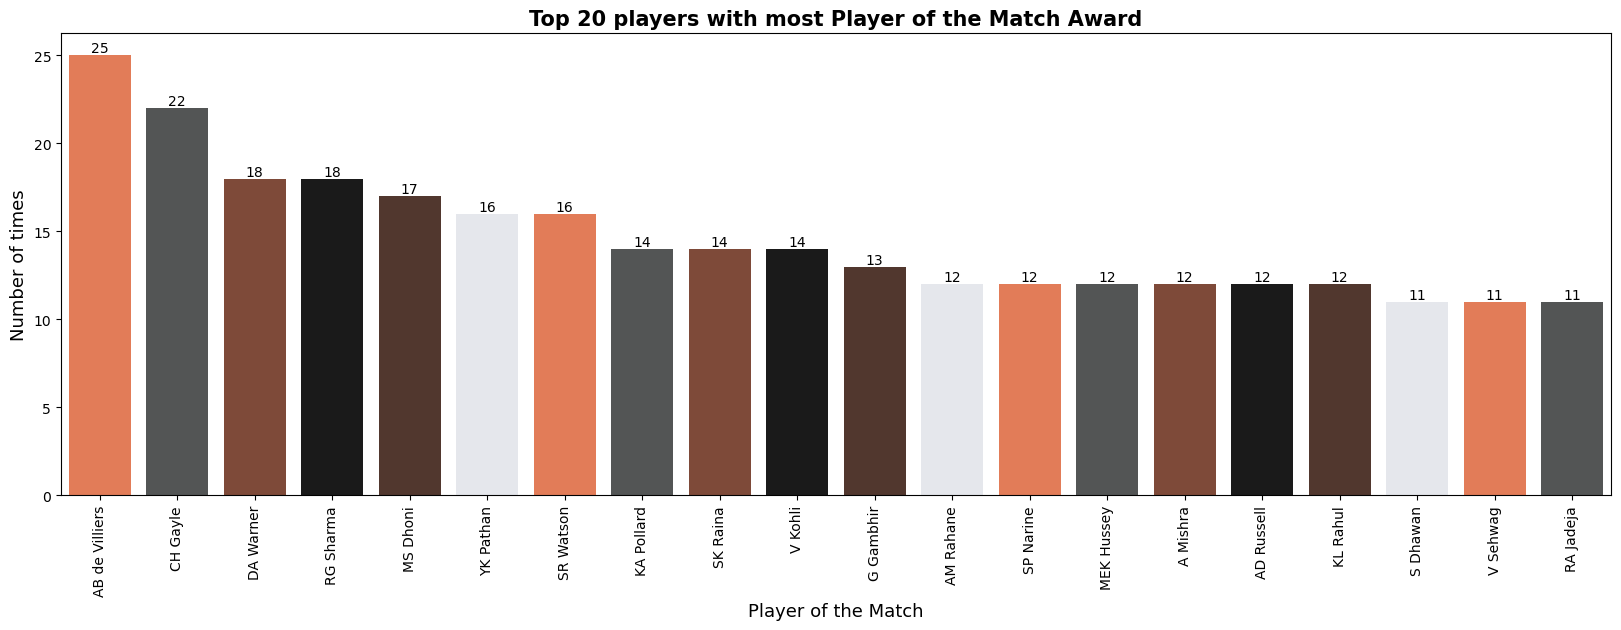

In [15]:
packt_palette = ["#f97141","#535555", "#89452D", "#1a1a1a",  "#573428",    "#E4E7ED"]
potm = pd.DataFrame({'POTM':df_matches['Player_of_Match'].value_counts().index, 'Number of times':df_matches['Player_of_Match'].value_counts()})
potm.reset_index(inplace=True,drop=True)
plt.figure(figsize=(20,6))
plt.xticks(rotation = 90)
ax = sns.barplot(data=potm.head(20),x='POTM',y='Number of times', palette=packt_palette)
plt.title('Top 20 players with most Player of the Match Award',size=15,fontweight='bold')
plt.xlabel('Player of the Match', size=13)
plt.ylabel('Number of times', size=13)
for i in ax.containers:
    ax.bar_label(i,)

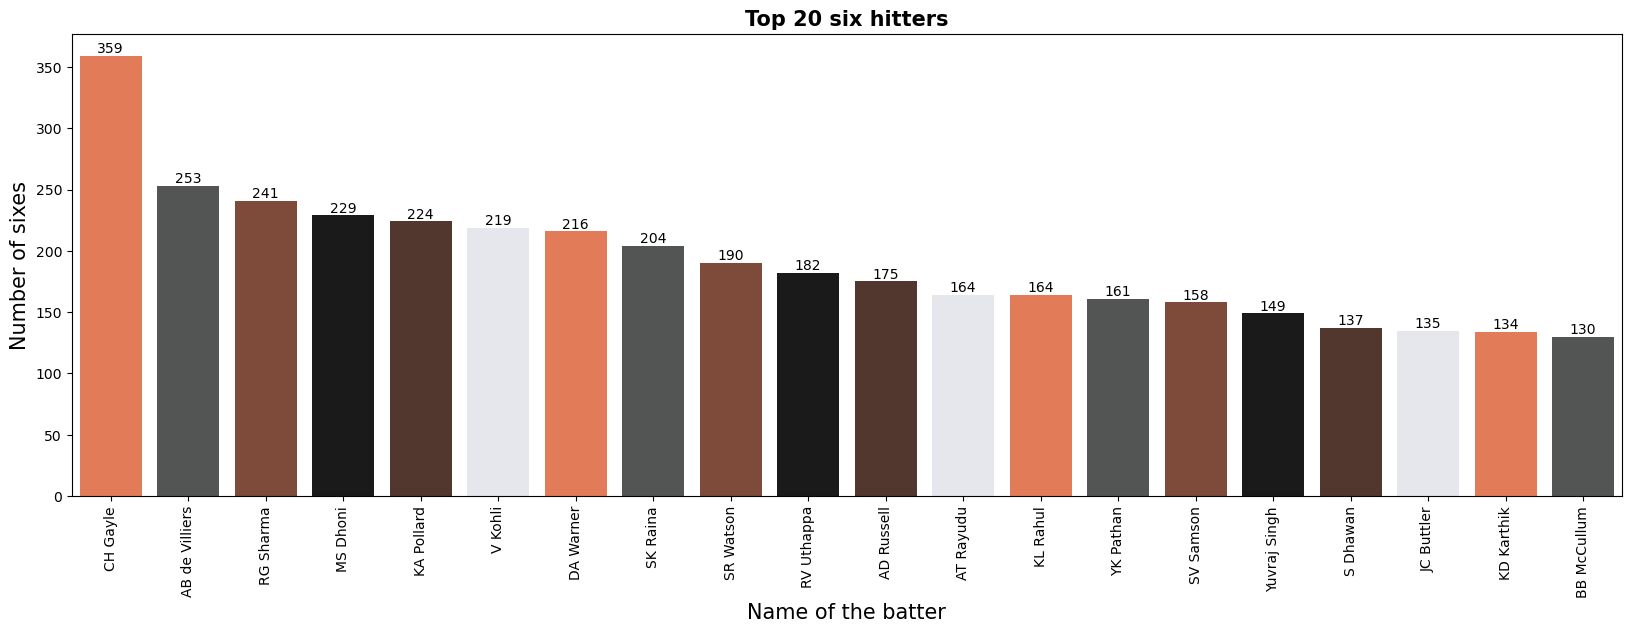

In [16]:
sixes=df_ballbyball[df_ballbyball['batsman_run']==6].groupby('batter').count()
sixes.reset_index(inplace=True)
sixes=sixes.sort_values('batsman_run',ascending=False)
plt.figure(figsize=(20,6))
plt.title('Top 20 six hitters',size=15,fontweight='bold')
plt.xticks(rotation = 90)
ax=sns.barplot(data=sixes.head(20),x='batter',y='batsman_run', palette= packt_palette)
plt.xlabel('Name of the batter', size=15)
plt.ylabel('Number of sixes', size=15)
for i in ax.containers:
    ax.bar_label(i,)

### Creating a column for 'phase of play' (type of over) in the ball_by_ball dataset

In [17]:
# Creating a function for determining phase of the game

def phase_of_game(over):
    if over >= 0 and over < 6:
        return 'Power Play'
    elif over >= 6 and over < 15:
        return 'Middle Overs'
    else:
        return 'Death Overs'

In [18]:
# Applying that function to the ball_by_ball dataset

df_ballbyball['Phase of play'] = df_ballbyball['overs'].map(phase_of_game)

In [19]:
df_ballbyball.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,...,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,BowlingTeam,Phase of play
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,...,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,Gujarat Titans,Power Play
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,...,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,Gujarat Titans,Power Play
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,...,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,Gujarat Titans,Power Play
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,...,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,Gujarat Titans,Power Play
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,...,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,Gujarat Titans,Power Play


## Creating a dataframe for just bowlers (all phases) (all kinds of overs)

In [20]:
df_bowlers = pd.DataFrame()

In [21]:
df_bowlers = df_ballbyball.groupby('bowler').agg({'total_run':'sum','isWicketDelivery':'sum'}).reset_index()
df_bowlers.columns = ['Bowler','Runs Conceded','Wickets']

In [22]:
dfBallsBowled = df_ballbyball[~(df_ballbyball['extra_type']=='wides')].groupby('bowler')['ID'].count().reset_index()
dfBallsBowled.columns = ['Bowler','Balls Bowled']
df_bowlers = df_bowlers.merge(dfBallsBowled, on='Bowler')
df_bowlers['Overs'] = df_bowlers['Balls Bowled']/6
df_bowlers['Bowling Average'] = df_bowlers['Runs Conceded']/df_bowlers['Wickets']
df_bowlers['Bowling Strike Rate'] = df_bowlers['Balls Bowled']/df_bowlers['Wickets']
df_bowlers['Economy Rate'] = df_bowlers['Runs Conceded']/df_bowlers['Overs']
df_bowlers


,Bowler,Runs Conceded,Wickets,Balls Bowled,Overs,Bowling Average,Bowling Strike Rate,Economy Rate
0,A Ashish Reddy,400,19,264,44.000000,21.052632,13.894737,9.090909
1,A Badoni,12,2,12,2.000000,6.000000,6.000000,6.000000
2,A Chandila,245,11,234,39.000000,22.272727,21.272727,6.282051
3,A Choudhary,144,5,102,17.000000,28.800000,20.400000,8.470588
4,A Dananjaya,47,0,24,4.000000,inf,inf,11.750000
...,...,...,...,...,...,...,...,...
467,YK Pathan,1443,46,1147,191.166667,31.369565,24.934783,7.548387
468,YS Chahal,3699,172,2864,477.333333,21.505814,16.651163,7.749302
469,Yash Dayal,296,13,195,32.500000,22.769231,15.000000,9.107692
470,Yuvraj Singh,1091,39,870,145.000000,27.974359,22.307692,7.524138


In [23]:
# Removing the bowlers with zero wickets

df_bowlers.drop(df_bowlers[df_bowlers['Wickets'] == 0].index, inplace=True)

In [24]:
df_bowlers

,Bowler,Runs Conceded,Wickets,Balls Bowled,Overs,Bowling Average,Bowling Strike Rate,Economy Rate
0,A Ashish Reddy,400,19,264,44.000000,21.052632,13.894737,9.090909
1,A Badoni,12,2,12,2.000000,6.000000,6.000000,6.000000
2,A Chandila,245,11,234,39.000000,22.272727,21.272727,6.282051
3,A Choudhary,144,5,102,17.000000,28.800000,20.400000,8.470588
5,A Flintoff,106,2,66,11.000000,53.000000,33.000000,9.636364
...,...,...,...,...,...,...,...,...
467,YK Pathan,1443,46,1147,191.166667,31.369565,24.934783,7.548387
468,YS Chahal,3699,172,2864,477.333333,21.505814,16.651163,7.749302
469,Yash Dayal,296,13,195,32.500000,22.769231,15.000000,9.107692
470,Yuvraj Singh,1091,39,870,145.000000,27.974359,22.307692,7.524138


In [25]:
#df_bowlers.to_csv('bowlers_data.csv')

### Performance metrics of individual bowlers in Death Overs

In [26]:
dfDeathOvers = df_ballbyball[df_ballbyball['Phase of play'] == 'Death Overs']
dfDeathBowling_bowlers = dfDeathOvers.groupby('bowler').agg({'total_run':'sum','isWicketDelivery':'sum'}).reset_index()
dfDeathBowling_bowlers.columns = ['Bowler','Runs Conceded','Wickets']
dfDOBallsBowled = df_ballbyball[~((df_ballbyball['extra_type']=='wides'))&(df_ballbyball['Phase of play']=='Death Overs')].groupby('bowler')['ID'].count().reset_index()
dfDOBallsBowled.columns = ['Bowler','Balls Bowled']
dfDeathBowling_bowlers = dfDeathBowling_bowlers.merge(dfDOBallsBowled, on='Bowler')
dfDeathBowling_bowlers['Overs'] = dfDeathBowling_bowlers['Balls Bowled']/6
dfDeathBowling_bowlers['Bowling Average'] = dfDeathBowling_bowlers['Runs Conceded']/dfDeathBowling_bowlers['Wickets']
dfDeathBowling_bowlers['Bowling Strike Rate'] = dfDeathBowling_bowlers['Balls Bowled']/dfDeathBowling_bowlers['Wickets']
dfDeathBowling_bowlers['Economy Rate'] = dfDeathBowling_bowlers['Runs Conceded']/dfDeathBowling_bowlers['Overs']
dfDeathBowling_bowlers

,Bowler,Runs Conceded,Wickets,Balls Bowled,Overs,Bowling Average,Bowling Strike Rate,Economy Rate
0,A Ashish Reddy,169,11,102,17.000000,15.363636,9.272727,9.941176
1,A Chandila,6,0,6,1.000000,inf,inf,6.000000
2,A Choudhary,40,1,24,4.000000,40.000000,24.000000,10.000000
3,A Flintoff,59,1,24,4.000000,59.000000,24.000000,14.750000
4,A Kumble,217,18,170,28.333333,12.055556,9.444444,7.658824
...,...,...,...,...,...,...,...,...
395,YK Pathan,127,4,79,13.166667,31.750000,19.750000,9.645570
396,YS Chahal,685,45,448,74.666667,15.222222,9.955556,9.174107
397,Yash Dayal,80,5,55,9.166667,16.000000,11.000000,8.727273
398,Yuvraj Singh,158,6,113,18.833333,26.333333,18.833333,8.389381


In [27]:
#  Removing the bowlers with zero wickets and less than 24 balls

dfDeathBowling_bowlers.drop(dfDeathBowling_bowlers[dfDeathBowling_bowlers['Wickets'] == 0].index, inplace=True)
dfDeathBowling_bowlers.drop(dfDeathBowling_bowlers[dfDeathBowling_bowlers['Balls Bowled'] < 24].index, inplace=True)

dfDeathBowling_bowlers

,Bowler,Runs Conceded,Wickets,Balls Bowled,Overs,Bowling Average,Bowling Strike Rate,Economy Rate
0,A Ashish Reddy,169,11,102,17.000000,15.363636,9.272727,9.941176
2,A Choudhary,40,1,24,4.000000,40.000000,24.000000,10.000000
3,A Flintoff,59,1,24,4.000000,59.000000,24.000000,14.750000
4,A Kumble,217,18,170,28.333333,12.055556,9.444444,7.658824
5,A Mishra,791,42,502,83.666667,18.833333,11.952381,9.454183
...,...,...,...,...,...,...,...,...
395,YK Pathan,127,4,79,13.166667,31.750000,19.750000,9.645570
396,YS Chahal,685,45,448,74.666667,15.222222,9.955556,9.174107
397,Yash Dayal,80,5,55,9.166667,16.000000,11.000000,8.727273
398,Yuvraj Singh,158,6,113,18.833333,26.333333,18.833333,8.389381


Text(0.5, 1.0, '10 Bowlers with the lowest strike rates in the Death Overs')

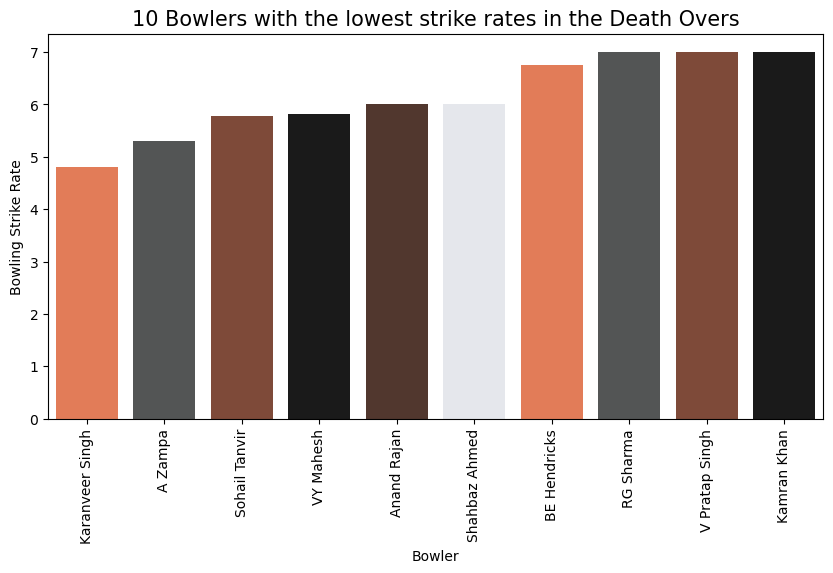

In [28]:
plt.figure(figsize=(10, 5))
sns.barplot(data=dfDeathBowling_bowlers.sort_values(by='Bowling Strike Rate').head(10),x='Bowler',y='Bowling Strike Rate', palette=packt_palette)
plt.xticks(rotation=90)
plt.title('10 Bowlers with the lowest strike rates in the Death Overs', size=15)

Text(0.5, 1.0, '10 Bowlers with the lowest economy rates in the Death Overs')

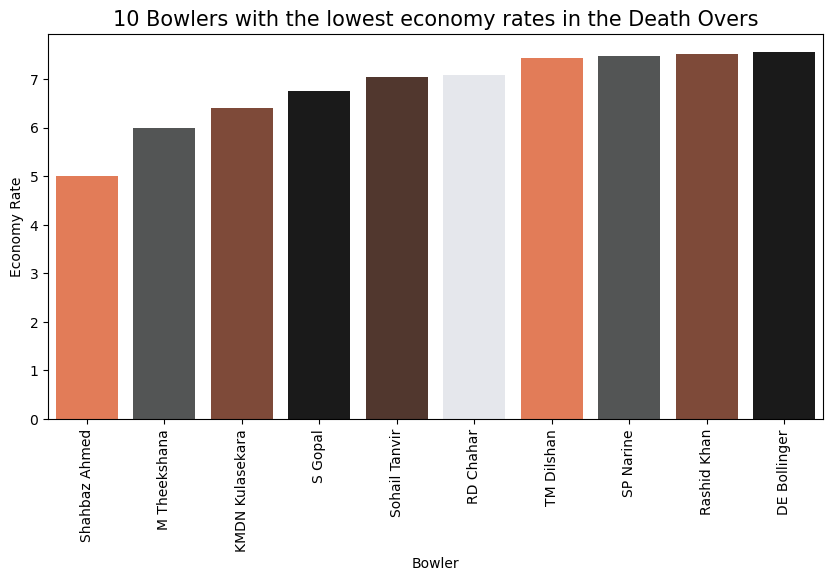

In [29]:
plt.figure(figsize=(10, 5))
sns.barplot(data=dfDeathBowling_bowlers.sort_values(by='Economy Rate').head(10),x='Bowler',y='Economy Rate', palette=packt_palette)
plt.xticks(rotation=90)
plt.title('10 Bowlers with the lowest economy rates in the Death Overs', size=15)

### Performance metrics of individual bowlers in Middle Overs

In [30]:
dfMiddleOvers = df_ballbyball[df_ballbyball['Phase of play'] == 'Middle Overs']
dfMiddleBowling_bowlers = dfMiddleOvers.groupby('bowler').agg({'total_run':'sum','isWicketDelivery':'sum'}).reset_index()
dfMiddleBowling_bowlers.columns = ['Bowler','Runs Conceded','Wickets']
dfMOBallsBowled = df_ballbyball[~((df_ballbyball['extra_type']=='wides'))&(df_ballbyball['Phase of play']=='Middle Overs')].groupby('bowler')['ID'].count().reset_index()
dfMOBallsBowled.columns = ['Bowler','Balls Bowled']
dfMiddleBowling_bowlers = dfMiddleBowling_bowlers.merge(dfMOBallsBowled, on='Bowler')
dfMiddleBowling_bowlers['Overs'] = dfMiddleBowling_bowlers['Balls Bowled']/6
dfMiddleBowling_bowlers['Bowling Average'] = dfMiddleBowling_bowlers['Runs Conceded']/dfMiddleBowling_bowlers['Wickets']
dfMiddleBowling_bowlers['Bowling Strike Rate'] = dfMiddleBowling_bowlers['Balls Bowled']/dfMiddleBowling_bowlers['Wickets']
dfMiddleBowling_bowlers['Economy Rate'] = dfMiddleBowling_bowlers['Runs Conceded']/dfMiddleBowling_bowlers['Overs']
dfMiddleBowling_bowlers

,Bowler,Runs Conceded,Wickets,Balls Bowled,Overs,Bowling Average,Bowling Strike Rate,Economy Rate
0,A Ashish Reddy,211,8,156,26.000000,26.375000,19.500000,8.115385
1,A Badoni,12,2,12,2.000000,6.000000,6.000000,6.000000
2,A Chandila,100,1,84,14.000000,100.000000,84.000000,7.142857
3,A Choudhary,58,1,41,6.833333,58.000000,41.000000,8.487805
4,A Dananjaya,35,0,18,3.000000,inf,inf,11.666667
...,...,...,...,...,...,...,...,...
445,YK Pathan,914,27,714,119.000000,33.851852,26.444444,7.680672
446,YS Chahal,2492,110,2029,338.166667,22.654545,18.445455,7.369147
447,Yash Dayal,76,3,50,8.333333,25.333333,16.666667,9.120000
448,Yuvraj Singh,933,33,757,126.166667,28.272727,22.939394,7.394980


In [31]:
# Removing bowlers with zero wickets and less than 24 balls

dfMiddleBowling_bowlers.drop(dfMiddleBowling_bowlers[dfMiddleBowling_bowlers['Wickets'] == 0].index, inplace=True)
dfMiddleBowling_bowlers.drop(dfMiddleBowling_bowlers[dfMiddleBowling_bowlers['Balls Bowled'] < 24].index, inplace=True)

dfMiddleBowling_bowlers

,Bowler,Runs Conceded,Wickets,Balls Bowled,Overs,Bowling Average,Bowling Strike Rate,Economy Rate
0,A Ashish Reddy,211,8,156,26.000000,26.375000,19.500000,8.115385
2,A Chandila,100,1,84,14.000000,100.000000,84.000000,7.142857
3,A Choudhary,58,1,41,6.833333,58.000000,41.000000,8.487805
5,A Flintoff,26,1,30,5.000000,26.000000,30.000000,5.200000
6,A Kumble,782,28,692,115.333333,27.928571,24.714286,6.780347
...,...,...,...,...,...,...,...,...
445,YK Pathan,914,27,714,119.000000,33.851852,26.444444,7.680672
446,YS Chahal,2492,110,2029,338.166667,22.654545,18.445455,7.369147
447,Yash Dayal,76,3,50,8.333333,25.333333,16.666667,9.120000
448,Yuvraj Singh,933,33,757,126.166667,28.272727,22.939394,7.394980


Text(0.5, 1.0, '10 Bowlers with the lowest strike rates in the Middle Overs')

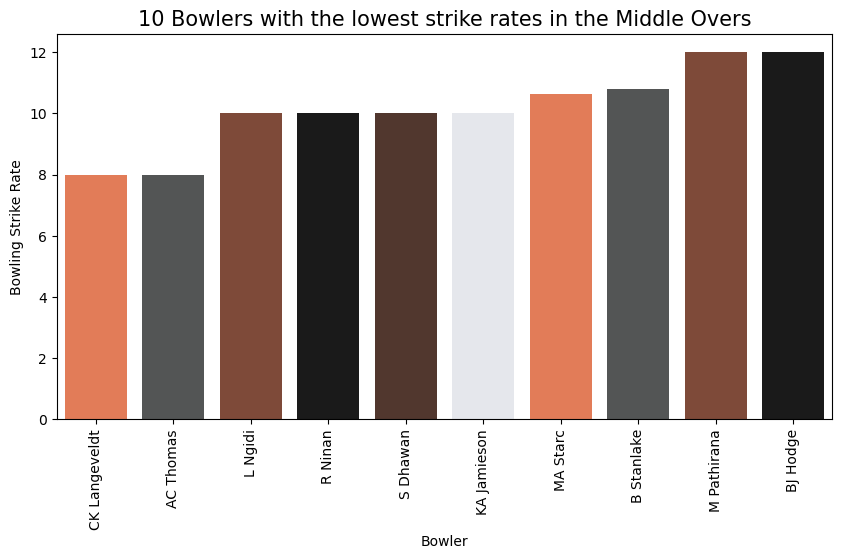

In [32]:
plt.figure(figsize=(10, 5))
sns.barplot(data=dfMiddleBowling_bowlers.sort_values(by='Bowling Strike Rate').head(10),x='Bowler',y='Bowling Strike Rate', palette=packt_palette)
plt.xticks(rotation=90)
plt.title('10 Bowlers with the lowest strike rates in the Middle Overs', size=15)

Text(0.5, 1.0, '10 Bowlers with the lowest economy rates in the Middle Overs')

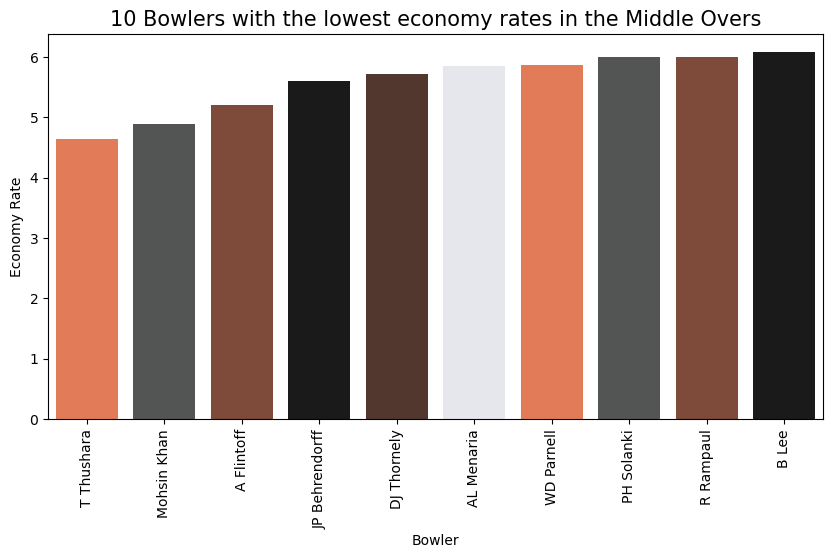

In [33]:
plt.figure(figsize=(10, 5))
sns.barplot(data=dfMiddleBowling_bowlers.sort_values(by='Economy Rate').head(10),x='Bowler',y='Economy Rate', palette=packt_palette)
plt.xticks(rotation=90)
plt.title('10 Bowlers with the lowest economy rates in the Middle Overs', size=15)

### Performance metrics of individual bowlers in the power play phase

In [34]:
dfPowerPlay = df_ballbyball[df_ballbyball['Phase of play'] == 'Power Play']
dfPowerPlay_bowlers = dfPowerPlay.groupby('bowler').agg({'total_run':'sum','isWicketDelivery':'sum'}).reset_index()
dfPowerPlay_bowlers.columns = ['Bowler','Runs Conceded','Wickets']
dfPPBallsBowled = df_ballbyball[~((df_ballbyball['extra_type']=='wides'))&(df_ballbyball['Phase of play']=='Power Play')].groupby('bowler')['ID'].count().reset_index()
dfPPBallsBowled.columns = ['Bowler','Balls Bowled']
dfPowerPlay_bowlers = dfPowerPlay_bowlers.merge(dfPPBallsBowled, on='Bowler')
dfPowerPlay_bowlers['Overs'] = dfPowerPlay_bowlers['Balls Bowled']/6
dfPowerPlay_bowlers['Bowling Average'] = dfPowerPlay_bowlers['Runs Conceded']/dfPowerPlay_bowlers['Wickets']
dfPowerPlay_bowlers['Bowling Strike Rate'] = dfPowerPlay_bowlers['Balls Bowled']/dfPowerPlay_bowlers['Wickets']
dfPowerPlay_bowlers['Economy Rate'] = dfPowerPlay_bowlers['Runs Conceded']/dfPowerPlay_bowlers['Overs']
dfPowerPlay_bowlers

,Bowler,Runs Conceded,Wickets,Balls Bowled,Overs,Bowling Average,Bowling Strike Rate,Economy Rate
0,A Ashish Reddy,20,0,6,1.000000,inf,inf,20.000000
1,A Chandila,139,10,144,24.000000,13.900000,14.400000,5.791667
2,A Choudhary,46,3,37,6.166667,15.333333,12.333333,7.459459
3,A Dananjaya,12,0,6,1.000000,inf,inf,12.000000
4,A Flintoff,21,0,12,2.000000,inf,inf,10.500000
...,...,...,...,...,...,...,...,...
378,YA Abdulla,103,7,84,14.000000,14.714286,12.000000,7.357143
379,YK Pathan,402,15,354,59.000000,26.800000,23.600000,6.813559
380,YS Chahal,522,17,387,64.500000,30.705882,22.764706,8.093023
381,Yash Dayal,140,5,90,15.000000,28.000000,18.000000,9.333333


In [35]:
# Removing bowlers with zero wickets and less than 24 balls

dfPowerPlay_bowlers.drop(dfPowerPlay_bowlers[dfPowerPlay_bowlers['Wickets'] == 0].index, inplace=True)
dfPowerPlay_bowlers.drop(dfPowerPlay_bowlers[dfPowerPlay_bowlers['Balls Bowled'] < 24].index, inplace=True)

dfPowerPlay_bowlers

,Bowler,Runs Conceded,Wickets,Balls Bowled,Overs,Bowling Average,Bowling Strike Rate,Economy Rate
1,A Chandila,139,10,144,24.000000,13.900000,14.400000,5.791667
2,A Choudhary,46,3,37,6.166667,15.333333,12.333333,7.459459
5,A Kumble,90,3,108,18.000000,30.000000,36.000000,5.000000
6,A Mishra,174,6,140,23.333333,29.000000,23.333333,7.457143
7,A Mithun,105,1,68,11.333333,105.000000,68.000000,9.264706
...,...,...,...,...,...,...,...,...
378,YA Abdulla,103,7,84,14.000000,14.714286,12.000000,7.357143
379,YK Pathan,402,15,354,59.000000,26.800000,23.600000,6.813559
380,YS Chahal,522,17,387,64.500000,30.705882,22.764706,8.093023
381,Yash Dayal,140,5,90,15.000000,28.000000,18.000000,9.333333


Text(0.5, 1.0, '10 Bowlers with the lowest strike rates in the Power Play phase')

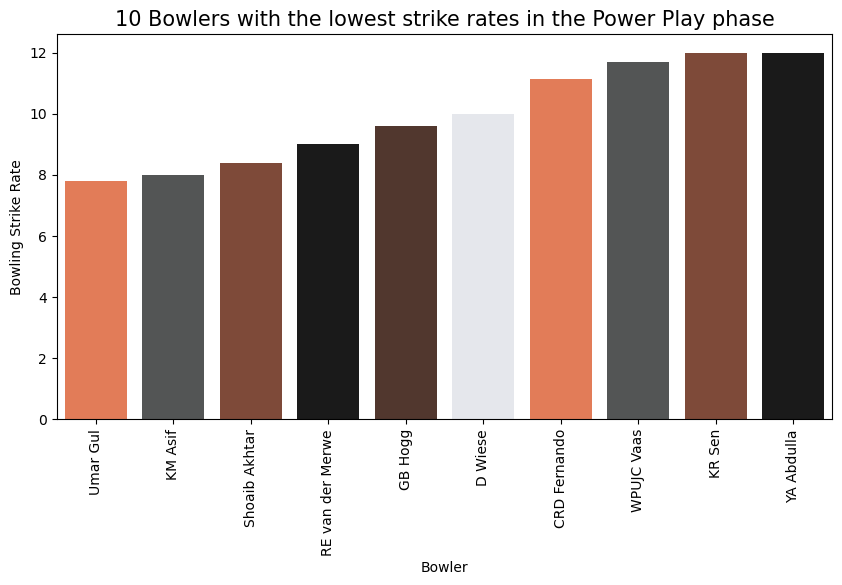

In [36]:
plt.figure(figsize=(10, 5))
sns.barplot(data=dfPowerPlay_bowlers.sort_values(by='Bowling Strike Rate').head(10),x='Bowler',y='Bowling Strike Rate', palette=packt_palette)
plt.xticks(rotation=90)
plt.title('10 Bowlers with the lowest strike rates in the Power Play phase', size=15)

Text(0.5, 1.0, '10 Bowlers with the lowest economy rates in the Power Play Phase')

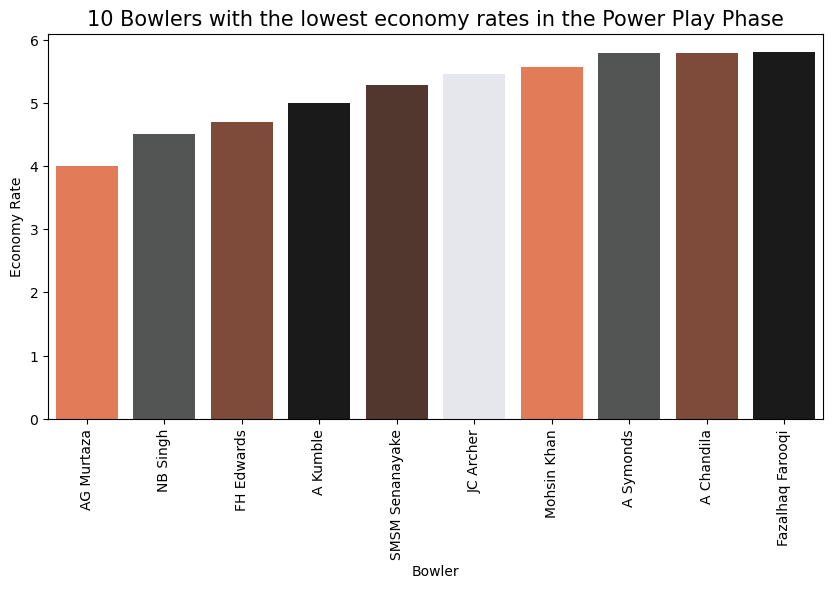

In [37]:
plt.figure(figsize=(10, 5))
sns.barplot(data=dfPowerPlay_bowlers.sort_values(by='Economy Rate').head(10),x='Bowler',y='Economy Rate', palette=packt_palette)
plt.xticks(rotation=90)
plt.title('10 Bowlers with the lowest economy rates in the Power Play Phase', size=15)

## Creating a dataset for teams and their bowling performance metrics

In [38]:
df_teams = pd.DataFrame({})

df_teams = df_ballbyball.groupby('BowlingTeam').agg({'total_run':'sum','isWicketDelivery':'sum'}).reset_index()

df_teams.columns = ['Team','Runs Conceded','Wickets']
dfBallsBowled = df_ballbyball[~(df_ballbyball['extra_type']=='wides')].groupby('BowlingTeam')['ID'].count().reset_index()
dfBallsBowled.columns = ['Team','Balls Bowled']
df_teams = df_teams.merge(dfBallsBowled, on='Team')
df_teams['Overs'] = df_teams['Balls Bowled']/6
df_teams['Bowling Average'] = df_teams['Runs Conceded']/df_teams['Wickets']
df_teams['Bowling Strike Rate'] = df_teams['Balls Bowled']/df_teams['Wickets']
df_teams['Economy Rate'] = df_teams['Runs Conceded']/df_teams['Overs']
df_teams = df_teams.sort_values('Economy Rate',ascending=False).reset_index(drop=True)

df_teams['Number of matches played'] = 0
for i in range(len(df_teams)):
    df_teams['Number of matches played'][i] = df_matches['Team1'].value_counts()[df_teams['Team'][i]] + df_matches['Team2'].value_counts()[df_teams['Team'][i]]
    

df_teams['Number of toss wins'] = 0
for i in range(len(df_teams)):
    df_teams['Number of toss wins'][i] = df_matches['TossWinner'].value_counts()[df_teams['Team'][i]]
    

df_teams['Number of match wins'] = 0
for i in range(len(df_teams)):
    df_teams['Number of match wins'][i] = df_matches['WinningTeam'].value_counts()[df_teams['Team'][i]]
    

df_teams['Number of matches in which the team won the toss and the match'] = 0
for team in df_teams['Team']:
    count_team = 0
    for i in range(len(df_matches)):
        if ((team == df_matches['WinningTeam'][i]) & (team == df_matches['TossWinner'][i])):
            count_team += 1
    df_teams['Number of matches in which the team won the toss and the match'][df_teams['Team'] == team] = count_team
    

df_teams['Number of match wins/Number of matches played'] = 0
for i in range(len(df_teams)):
    df_teams['Number of match wins/Number of matches played'][i] = df_teams['Number of match wins'][i]/df_teams['Number of matches played'][i]







C:\Users\SinjiniGhosh\AppData\Local\Temp\ipykernel_5536\3510885442.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teams['Number of matches played'][i] = df_matches['Team1'].value_counts()[df_teams['Team'][i]] + df_matches['Team2'].value_counts()[df_teams['Team'][i]]
C:\Users\SinjiniGhosh\AppData\Local\Temp\ipykernel_5536\3510885442.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teams['Number of matches played'][i] = df_matches['Team1'].value_counts()[df_teams['Team'][i]] + df_matches['Team2'].value_counts()[df_teams['Team'][i]]
C:\Users\SinjiniGhosh\AppData\Local\Temp\ipykernel_5536\3510885442.py:17: 

In [39]:
df_teams

,Team,Runs Conceded,Wickets,Balls Bowled,Overs,Bowling Average,Bowling Strike Rate,Economy Rate,Number of matches played,Number of toss wins,Number of match wins,Number of matches in which the team won the toss and the match,Number of match wins/Number of matches played
0,Gujarat Titans,7624,252,5306,884.333333,30.253968,21.055556,8.621184,46,25,25,17,0.543478
1,Lucknow Super Giants,2496,100,1771,295.166667,24.960000,17.710000,8.456239,15,7,9,4,0.600000
2,Punjab Kings,34830,1238,24941,4156.833333,28.134087,20.146204,8.378974,218,94,101,40,0.463303
3,Royal Challengers Bangalore,35546,1311,25828,4304.666667,27.113654,19.700992,8.257550,226,105,109,53,0.482301
4,Rajasthan Royals,30096,1095,22047,3674.500000,27.484932,20.134247,8.190502,192,99,96,49,0.500000
5,Delhi Capitals,34939,1317,25676,4279.333333,26.529233,19.495824,8.164589,224,116,103,56,0.459821
6,Kolkata Knight Riders,34209,1275,25622,4270.333333,26.830588,20.095686,8.010850,223,114,114,64,0.511211
7,Sunrisers Hyderabad,35219,1361,26414,4402.333333,25.877296,19.407788,8.000076,227,117,104,53,0.458150
8,Chennai Super Kings,32064,1290,24069,4011.500000,24.855814,18.658140,7.993020,208,109,121,68,0.581731
9,Mumbai Indians,35682,1411,26931,4488.500000,25.288448,19.086464,7.949649,231,123,131,70,0.567100


In [40]:
#df_teams.to_csv('teams_data_bowling.csv')

### Performance metrics of teams in Death Overs

In [44]:
dfDeathBowling = dfDeathOvers.groupby('BowlingTeam').agg({'total_run':'sum','isWicketDelivery':'sum'}).reset_index()
dfDeathBowling.columns = ['Team','Runs Conceded','Wickets']
dfDOBallsBowled = df_ballbyball[~((df_ballbyball['extra_type']=='wides'))&(df_ballbyball['Phase of play']=='Death Overs')].groupby('BowlingTeam')['ID'].count().reset_index()
dfDOBallsBowled.columns = ['Team','Balls Bowled']
dfDeathBowling = dfDeathBowling.merge(dfDOBallsBowled, on='Team')
dfDeathBowling['Overs'] = dfDeathBowling['Balls Bowled']/6
dfDeathBowling['Bowling Average'] = dfDeathBowling['Runs Conceded']/dfDeathBowling['Wickets']
dfDeathBowling['Bowling Strike Rate'] = dfDeathBowling['Balls Bowled']/dfDeathBowling['Wickets']
dfDeathBowling['Economy Rate'] = dfDeathBowling['Runs Conceded']/dfDeathBowling['Overs']
dfDeathBowling = dfDeathBowling.sort_values('Economy Rate',ascending=False).reset_index(drop=True)
dfDeathBowling

,Team,Runs Conceded,Wickets,Balls Bowled,Overs,Bowling Average,Bowling Strike Rate,Economy Rate
0,Lucknow Super Giants,776,35,418,69.666667,22.171429,11.942857,11.138756
1,Gujarat Titans,1999,89,1163,193.833333,22.460674,13.067416,10.312984
2,Punjab Kings,9261,468,5509,918.166667,19.788462,11.771368,10.086404
3,Royal Challengers Bangalore,9711,491,5813,968.833333,19.778004,11.839104,10.023396
4,Rajasthan Royals,8217,394,4939,823.166667,20.855330,12.535533,9.982183
5,Sunrisers Hyderabad,9892,518,6091,1015.166667,19.096525,11.758687,9.744213
6,Delhi Capitals,9467,506,5869,978.166667,18.709486,11.598814,9.678310
7,Rising Pune Supergiants,3210,165,2006,334.333333,19.454545,12.157576,9.601196
8,Kolkata Knight Riders,9120,473,5737,956.166667,19.281184,12.128964,9.538086
9,Chennai Super Kings,8542,475,5423,903.833333,17.983158,11.416842,9.450857


Text(0.5, 1.0, 'Teams and their Bowling Strike Rates in Death Overs')

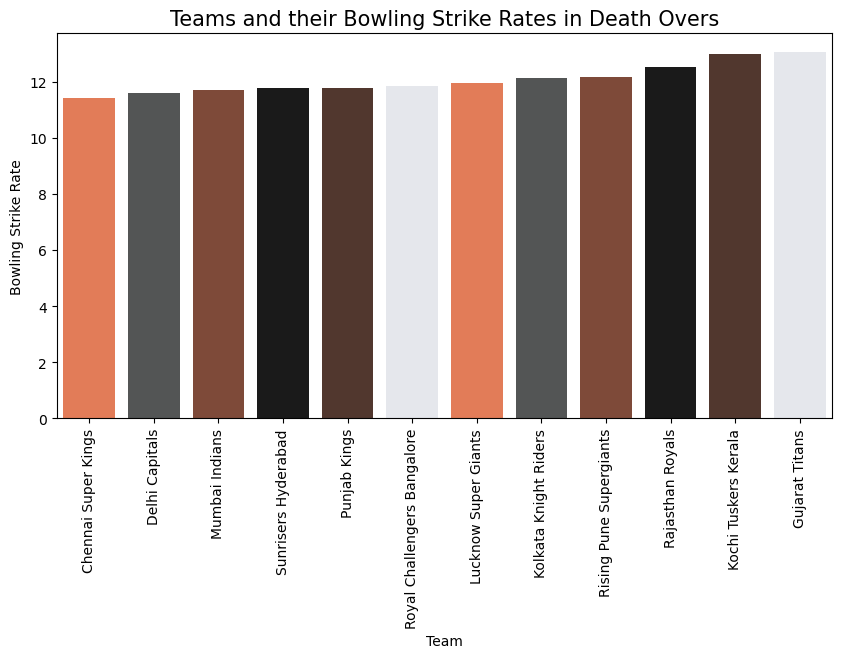

In [45]:
plt.figure(figsize=(10, 5))
sns.barplot(data=dfDeathBowling.sort_values(by='Bowling Strike Rate'),x='Team',y='Bowling Strike Rate', palette=packt_palette)
plt.xticks(rotation=90)
plt.title('Teams and their Bowling Strike Rates in Death Overs', size=15)

Text(0.5, 1.0, 'Teams and their Economy Rates in Death Overs')

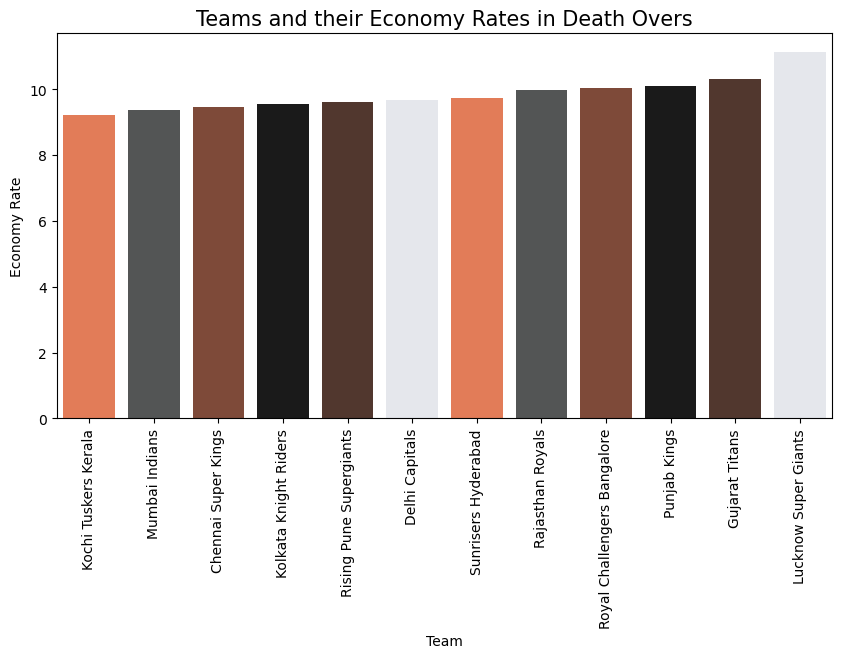

In [46]:
plt.figure(figsize=(10, 5))
sns.barplot(data=dfDeathBowling.sort_values(by='Economy Rate'),x='Team',y='Economy Rate', palette=packt_palette)
plt.xticks(rotation=90)
plt.title('Teams and their Economy Rates in Death Overs', size=15)

### Performance metrics of teams in Middle Overs

In [47]:
dfMiddleBowling = dfMiddleOvers.groupby('BowlingTeam').agg({'total_run':'sum','isWicketDelivery':'sum'}).reset_index()
dfMiddleBowling.columns = ['Team','Runs Conceded','Wickets']
dfMOBallsBowled = df_ballbyball[~((df_ballbyball['extra_type']=='wides'))&(df_ballbyball['Phase of play']=='Middle Overs')].groupby('BowlingTeam')['ID'].count().reset_index()
dfMOBallsBowled.columns = ['Team','Balls Bowled']
dfMiddleBowling = dfMiddleBowling.merge(dfMOBallsBowled, on='Team')
dfMiddleBowling['Overs'] = dfMiddleBowling['Balls Bowled']/6
dfMiddleBowling['Bowling Average'] = dfMiddleBowling['Runs Conceded']/dfMiddleBowling['Wickets']
dfMiddleBowling['Bowling Strike Rate'] = dfMiddleBowling['Balls Bowled']/dfMiddleBowling['Wickets']
dfMiddleBowling['Economy Rate'] = dfMiddleBowling['Runs Conceded']/dfMiddleBowling['Overs']
dfMiddleBowling = dfMiddleBowling.sort_values('Economy Rate',ascending=False).reset_index(drop=True)
dfMiddleBowling

,Team,Runs Conceded,Wickets,Balls Bowled,Overs,Bowling Average,Bowling Strike Rate,Economy Rate
0,Gujarat Titans,3386,87,2481,413.500000,38.919540,28.517241,8.188634
1,Punjab Kings,15167,468,11535,1922.500000,32.408120,24.647436,7.889207
2,Delhi Capitals,15124,496,11760,1960.000000,30.491935,23.709677,7.716327
3,Royal Challengers Bangalore,15254,515,11878,1979.666667,29.619417,23.064078,7.705338
4,Rajasthan Royals,13025,404,10157,1692.833333,32.240099,25.141089,7.694201
5,Mumbai Indians,15954,539,12466,2077.666667,29.599258,23.128015,7.678806
6,Sunrisers Hyderabad,15232,522,12107,2017.833333,29.180077,23.193487,7.548691
7,Kolkata Knight Riders,14777,514,11807,1967.833333,28.749027,22.970817,7.509274
8,Chennai Super Kings,13850,495,11127,1854.500000,27.979798,22.478788,7.468320
9,Kochi Tuskers Kerala,914,28,742,123.666667,32.642857,26.500000,7.390836


Text(0.5, 1.0, 'Teams and their Bowling Strike Rates in Middle Overs')

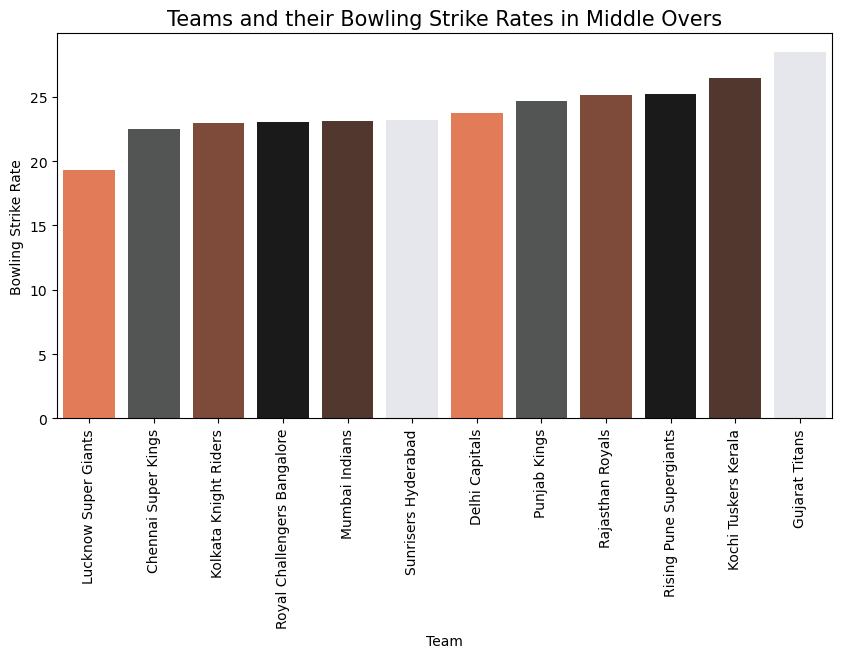

In [48]:
plt.figure(figsize=(10, 5))
sns.barplot(data=dfMiddleBowling.sort_values(by='Bowling Strike Rate'),x='Team',y='Bowling Strike Rate', palette=packt_palette)
plt.xticks(rotation=90)
plt.title('Teams and their Bowling Strike Rates in Middle Overs', size=15)

Text(0.5, 1.0, 'Teams and their Economy Rates in Middle Overs')

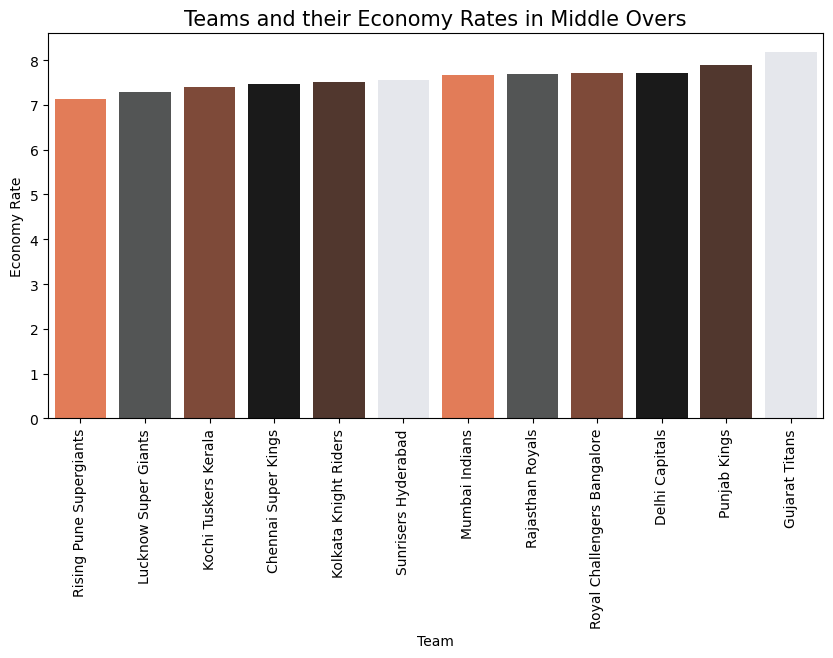

In [49]:
plt.figure(figsize=(10, 5))
sns.barplot(data=dfMiddleBowling.sort_values(by='Economy Rate'),x='Team',y='Economy Rate', palette=packt_palette)
plt.xticks(rotation=90)
plt.title('Teams and their Economy Rates in Middle Overs', size=15)

### Performance metrics of teams in the Power Play phase

In [50]:
dfPowerPlay = dfPowerPlay.groupby('BowlingTeam').agg({'total_run':'sum','isWicketDelivery':'sum'}).reset_index()
dfPowerPlay.columns = ['Team','Runs Conceded','Wickets']
dfPPBallsBowled = df_ballbyball[~((df_ballbyball['extra_type']=='wides'))&(df_ballbyball['Phase of play']=='Power Play')].groupby('BowlingTeam')['ID'].count().reset_index()
dfPPBallsBowled.columns = ['Team','Balls Bowled']
dfPowerPlay = dfPowerPlay.merge(dfPPBallsBowled, on='Team')
dfPowerPlay['Overs'] = dfPowerPlay['Balls Bowled']/6
dfPowerPlay['Bowling Average'] = dfPowerPlay['Runs Conceded']/dfPowerPlay['Wickets']
dfPowerPlay['Bowling Strike Rate'] = dfPowerPlay['Balls Bowled']/dfPowerPlay['Wickets']
dfPowerPlay['Economy Rate'] = dfPowerPlay['Runs Conceded']/dfPowerPlay['Overs']
dfPowerPlay = dfPowerPlay.sort_values('Economy Rate',ascending=False).reset_index(drop=True)
dfPowerPlay

,Team,Runs Conceded,Wickets,Balls Bowled,Overs,Bowling Average,Bowling Strike Rate,Economy Rate
0,Lucknow Super Giants,735,23,541,90.166667,31.956522,23.521739,8.151571
1,Gujarat Titans,2239,76,1662,277.000000,29.460526,21.868421,8.083032
2,Punjab Kings,10402,302,7897,1316.166667,34.443709,26.149007,7.903254
3,Royal Challengers Bangalore,10581,305,8137,1356.166667,34.691803,26.678689,7.802138
4,Chennai Super Kings,9672,320,7519,1253.166667,30.225000,23.496875,7.718048
5,Delhi Capitals,10348,315,8047,1341.166667,32.850794,25.546032,7.715670
6,Kolkata Knight Riders,10312,288,8078,1346.333333,35.805556,28.048611,7.659322
7,Rajasthan Royals,8854,297,6951,1158.500000,29.811448,23.404040,7.642641
8,Rising Pune Supergiants,3420,103,2741,456.833333,33.203883,26.611650,7.486319
9,Sunrisers Hyderabad,10095,321,8216,1369.333333,31.448598,25.595016,7.372201


Text(0.5, 1.0, 'Teams and their Bowling Strike Rates in Power Play phase')

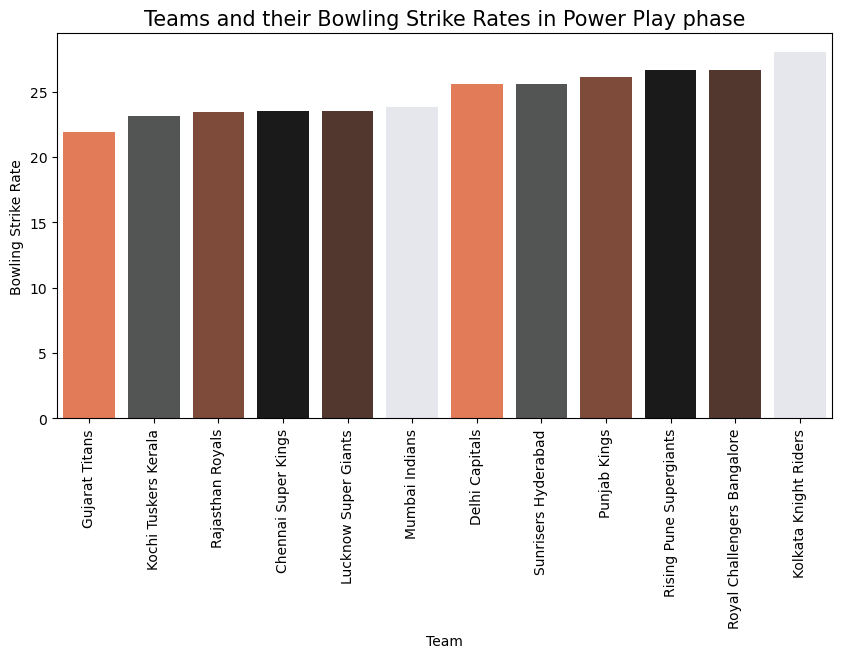

In [51]:
plt.figure(figsize=(10, 5))
sns.barplot(data=dfPowerPlay.sort_values(by='Bowling Strike Rate'),x='Team',y='Bowling Strike Rate', palette=packt_palette)
plt.xticks(rotation=90)
plt.title('Teams and their Bowling Strike Rates in Power Play phase', size=15)

Text(0.5, 1.0, 'Teams and their Economy Rates in Power Play phase')

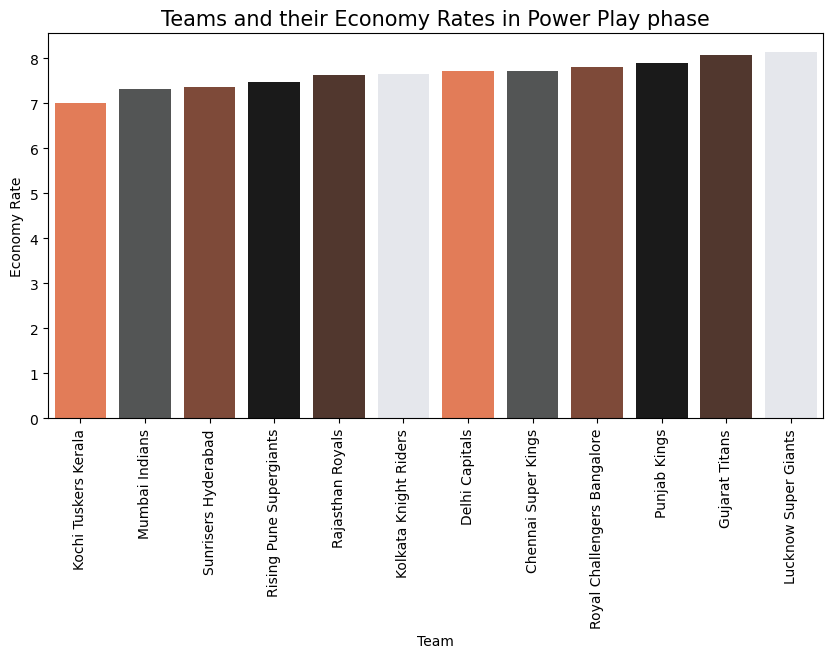

In [52]:
plt.figure(figsize=(10, 5))
sns.barplot(data=dfPowerPlay.sort_values(by='Economy Rate'),x='Team',y='Economy Rate', palette=packt_palette)
plt.xticks(rotation=90)
plt.title('Teams and their Economy Rates in Power Play phase', size=15)